In [4]:
import tensorflow as tf
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print(1)
    tf.config.experimental_connect_to_cluster(tpu)
    print(2)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    print(3)
    strategy = tf.distribute.TPUStrategy(tpu)
    print(4)
    BATCH_SIZE = strategy.num_replicas_in_sync * 4
    print("Running on TPU:", tpu.master())
    print(f"Batch Size good: {BATCH_SIZE}")
    
except ValueError:
    strategy = tf.distribute.get_strategy()
    BATCH_SIZE = 32
    print(f"Running on {strategy.num_replicas_in_sync} replicas")
    print(f"Batch Size: {BATCH_SIZE}")  

1
2
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.
3
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:

In [5]:




import numpy as np 
import pandas as pd 




import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv
/kaggle/input/daigt-v3-train-dataset/train_v3_drcat_01.csv
/kaggle/input/daigt-v3-train-dataset/train_v3_drcat_02.csv
/kaggle/input/llm-detect-ai-generated-text-deobfuscation/train_from_LLM-Detect_AI-GT_1MNB-3SGD.csv


In [6]:
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(y_test, y_pred):
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_test, y_pred):
    
    y_pred_class = np.where(y_pred > 0.5, 1, 0)  

    cm = confusion_matrix(y_test, y_pred_class)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

In [9]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

def plot_loss(history):
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [10]:
from IPython.display import clear_output

In [12]:
import pandas as pd
train=pd.read_csv("/kaggle/input/daigt-v3-train-dataset/train_v3_drcat_02.csv")



In [13]:

class_counts = train['label'].value_counts()


minority_class_count = class_counts.min()


train_balanced = pd.concat([
    train[train['label'] == label].sample(n=minority_class_count, replace=False, random_state=42)
    for label in class_counts.index
])


train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
train = train_balanced

In [14]:
train.head(5)

,text,label,prompt_name,source,RDizzl3_seven,model
0,Phone and driving\n\nThrough my 18 years of li...,0,Phones and driving,persuade_corpus,False,human
1,"No matter who you are, it is important to acco...",1,Seeking multiple opinions,chat_gpt_moth,False,gpt
2,The idea of driverless cars sounds very unsafe...,0,Driverless cars,persuade_corpus,True,human
3,Having extracurricular activities is bad for s...,0,Mandatory extracurricular activities,persuade_corpus,False,human
4,In the year 2000 there was a presidential elec...,0,Does the electoral college work?,train_essays,True,human


In [15]:
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [24]:
import re
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    
    text = text.lower()
    
    
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    
    text = re.sub(r'[^\w\s]', '', text)
    
    
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
train.head(5)

,text,label,prompt_name,source,RDizzl3_seven,model
0,Phone and driving\n\nThrough my 18 years of li...,0,Phones and driving,persuade_corpus,False,human
1,"No matter who you are, it is important to acco...",1,Seeking multiple opinions,chat_gpt_moth,False,gpt
2,The idea of driverless cars sounds very unsafe...,0,Driverless cars,persuade_corpus,True,human
3,Having extracurricular activities is bad for s...,0,Mandatory extracurricular activities,persuade_corpus,False,human
4,In the year 2000 there was a presidential elec...,0,Does the electoral college work?,train_essays,True,human


In [26]:
train['text'] = train['text'].apply(clean_text)

In [27]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train['text'], train['label'], test_size=0.2, random_state=42)



In [29]:
lunghezze_testi_mediana=512

In [30]:
from transformers import AutoTokenizer,TFBertModel
model_check='bert-base-uncased'

tokenizer = AutoTokenizer.from_pretrained(model_check)

def encode_text(text, tokenizer):
    encoded = tokenizer.batch_encode_plus(
        text,
        add_special_tokens=True,
        max_length=lunghezze_testi_mediana,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors="tf",
    )
    
    input_ids = np.array(encoded["input_ids"], dtype="int32")
    attention_masks = np.array(encoded["attention_mask"], dtype="int32")

    return {
        "input_ids": input_ids,
        "attention_masks": attention_masks
    }

In [31]:
import numpy as np

X_train = encode_text(X_train.tolist(), tokenizer)
X_test = encode_text(X_test.tolist(), tokenizer)

y_train = Y_train.values
y_test = Y_test.values  

In [32]:
y_test

array([1, 0, 1, ..., 1, 1, 0])

In [33]:
import keras

learning_rate = 0.0001
hidden_units = 512
projection_units = 768
num_epochs = 15
dropout_rate = 0.15
temperature = 0.03

In [34]:
import tensorflow_addons as tfa

/usr/local/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [35]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=1, name=None):
        super().__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        
        logits = tf.divide(
            tf.matmul(
                feature_vectors_normalized, tf.transpose(feature_vectors_normalized)
            ),
            self.temperature,
        )
        
        labels = tf.reshape(labels, [tf.shape(logits)[0], -1])
        
        labels = tf.reshape(labels, [tf.shape(labels)[0]])
        
        return tfa.losses.npairs_loss(labels, logits)
    
def add_projection_head(encoder):
    input_ids_in = tf.keras.Input(shape=(max_length,), name='input_ids', dtype='int32')
    attention_mask_in = tf.keras.Input(shape=(max_length,), name='attention_masks', dtype='int32')
    
    features = encoder([input_ids_in, attention_mask_in])
    outputs = keras.layers.Dense(projection_units, activation="relu")(features)
    model = keras.Model(
        inputs=[input_ids_in, attention_mask_in], outputs=outputs, name="encoder_with_projection-head"
    )
    return model

In [36]:
from transformers import TFBertModel

def create_bert_encoder(max_length):
    model_check = 'bert-base-uncased'
    bert_model = TFBertModel.from_pretrained(model_check)
    
    
    for layer in bert_model.layers:
        layer.trainable = False

    input_ids_in = tf.keras.Input(shape=(max_length,), name='input_ids', dtype='int32')
    attention_mask_in = tf.keras.Input(shape=(max_length,), name='attention_masks', dtype='int32')

    bert_outputs = bert_model(input_ids_in, attention_mask=attention_mask_in)
    pooled_output = bert_outputs.pooler_output  

    encoder_model = tf.keras.Model(inputs=[input_ids_in, attention_mask_in], outputs=pooled_output, name="text-encoder")
    
    return encoder_model


In [37]:
def create_binary_text_classifier(encoder, input_shape, learning_rate=0.001, dropout_rate=0.5):
    
    for layer in encoder.layers:
        layer.trainable = False

    
    input_ids_in = tf.keras.Input(shape=input_shape, name='input_ids', dtype='int32')
    attention_mask_in = tf.keras.Input(shape=input_shape, name='attention_masks', dtype='int32')

    
    text_features = encoder([input_ids_in, attention_mask_in])

    
    text_features = tf.keras.layers.Dropout(dropout_rate)(text_features)
    text_features = tf.keras.layers.Dense(512, activation='relu')(text_features)
    text_features = tf.keras.layers.Dropout(dropout_rate)(text_features)

    
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(text_features)

    
    binary_classifier = tf.keras.Model(inputs=[input_ids_in, attention_mask_in], outputs=outputs, name="binary-text-classifier")
    
    
    binary_classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                              loss=tf.keras.losses.BinaryCrossentropy(),
                              metrics=[tf.keras.metrics.BinaryAccuracy()])
    
    return binary_classifier

In [38]:
with strategy.scope():
    encoder = create_bert_encoder(lunghezze_testi_mediana)
    latent_test = encoder.predict((np.asarray(X_test["input_ids"]), np.asarray(X_test["attention_masks"])))


2024-01-12 15:29:15.666624: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-12 15:29:15.666750: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initi

  3/343 [..............................] - ETA: 13s    

2024-01-12 15:29:45.675903: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-12 15:29:45.676053: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-12 15:29:45.676153: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-12 15:29:45.676451: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-12 15:29:45.676578: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-12 15:29:45.676700: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-12 15:29:45.695087: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

156/343 [============>.................] - ETA: 6s

2024-01-12 15:29:50.959523: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


289/343 [========================>.....] - ETA: 1s

2024-01-12 15:29:55.586272: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


343/343 [==============================] - 27s 49ms/step


## Embedding prima del training

In [40]:
weights = tf.Variable(tf.reshape(latent_test,(X_test['input_ids'].shape[0],-1)), name="latent_test")

logdir = "loggers"

with open(os.path.join(logger, 'metadata.tsv'), 'w') as f:
    for label in y_test:  
        f.write(f'{label}\n')

        
checkpoint = tf.train.Checkpoint(latent_test=weights)
checkpoint.save(os.path.join(logdir, "embedding.ckpt"))

from tensorboard.plugins import projector

config = projector.ProjectorConfig()
embedding = config.embeddings.add()

embedding.tensor_name = "latent_test/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(logdir, config)

## Allenameto dell'encoder

In [41]:
from keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(monitor='loss', patience=3)

In [42]:
with strategy.scope():
    encoder = create_bert_encoder(lunghezze_testi_mediana)
    max_length = lunghezze_testi_mediana
    encoder_with_projection_head = add_projection_head(encoder)
    encoder_with_projection_head.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=SupervisedContrastiveLoss(temperature),
    )
    
    print("Shape of X_train:", X_train)
    encoder_with_projection_head.summary()


history_encoder = encoder_with_projection_head.fit(
    (np.asarray(X_train["input_ids"]), np.asarray(X_train["attention_masks"])),
    y_train, batch_size=BATCH_SIZE, epochs=num_epochs, callbacks=[early_stopping]
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Shape of X_train: {'input_ids': array([[  101,  5674,  2052, ...,     0,     0,     0],
       [  101, 13268,  2895, ..., 22749,  3468,   102],
       [  101,  8849,  2117, ...,  2191,  9832,   102],
       ...,
       [  101,  3522,  4439, ...,     0,     0,     0],
       [  101,  2181,  3232, ...,     0,     0,     0],
       [  101, 13268,  2895, ...,     0,     0,     0]], dtype=int32), 'attention_masks': array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)}
Model: "encoder_with_projection-head"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 512)]                0         []                            
                                

2024-01-12 15:31:09.923636: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-01-12 15:31:11.407044: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-12 15:31:11.407174: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


   5/1369 [..............................] - ETA: 53s - loss: 1.7836  

2024-01-12 15:31:20.286388: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-12 15:31:20.286589: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


 139/1369 [==>...........................] - ETA: 45s - loss: 1.3122

2024-01-12 15:31:25.243520: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-12 15:31:25.243661: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


 191/1369 [===>..........................] - ETA: 44s - loss: 1.2935

2024-01-12 15:31:27.272066: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


 223/1369 [===>..........................] - ETA: 42s - loss: 1.2844

2024-01-12 15:31:28.416137: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


 272/1369 [====>.........................] - ETA: 41s - loss: 1.2731

2024-01-12 15:31:30.248452: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


 405/1369 [=======>......................] - ETA: 36s - loss: 1.2503

2024-01-12 15:31:35.246949: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


1369/1369 [==============================] - 83s 42ms/step - loss: 1.1808
Epoch 2/15
1369/1369 [==============================] - 51s 38ms/step - loss: 1.1159
Epoch 3/15
  91/1369 [>.............................] - ETA: 47s - loss: 1.1006

2024-01-12 15:33:13.034405: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


1369/1369 [==============================] - 52s 38ms/step - loss: 1.0953
Epoch 4/15
1369/1369 [==============================] - 51s 37ms/step - loss: 1.0910
Epoch 5/15
1369/1369 [==============================] - 51s 37ms/step - loss: 1.0798
Epoch 6/15
1369/1369 [==============================] - 51s 37ms/step - loss: 1.0764
Epoch 7/15
1369/1369 [==============================] - 51s 37ms/step - loss: 1.0738
Epoch 8/15
1369/1369 [==============================] - 51s 37ms/step - loss: 1.0687
Epoch 9/15
1369/1369 [==============================] - 51s 37ms/step - loss: 1.0695
Epoch 10/15
1369/1369 [==============================] - 51s 37ms/step - loss: 1.0660
Epoch 11/15
1369/1369 [==============================] - 51s 37ms/step - loss: 1.0628
Epoch 12/15
1369/1369 [==============================] - 52s 38ms/step - loss: 1.0579
Epoch 13/15
1369/1369 [==============================] - 51s 37ms/step - loss: 1.0581
Epoch 14/15
1369/1369 [==============================] - 51s 38ms/step -

In [43]:
with strategy.scope():
    
    max_length = lunghezze_testi_mediana  

    
    input_shape = (max_length,)  

    
    binary_text_classifier = create_binary_text_classifier(encoder, input_shape)



In [45]:
from keras.callbacks import EarlyStopping


early_stopping2 = EarlyStopping(monitor='val_loss', patience=3)

In [46]:
history = binary_text_classifier.fit(
    (np.asarray(X_train["input_ids"]), np.asarray(X_train["attention_masks"])),
    y_train,
    batch_size=BATCH_SIZE,
    epochs=num_epochs,
    validation_data=(
        (np.asarray(X_test["input_ids"]), np.asarray(X_test["attention_masks"])),
        y_test,
    ),
    callbacks=[early_stopping2]
)

Epoch 1/15
1369/1369 [==============================] - 64s 47ms/step - loss: 0.3725 - binary_accuracy: 0.8400 - val_loss: 0.2637 - val_binary_accuracy: 0.8931
Epoch 2/15
1369/1369 [==============================] - 64s 47ms/step - loss: 0.3667 - binary_accuracy: 0.8412 - val_loss: 0.2491 - val_binary_accuracy: 0.9013
Epoch 3/15
1369/1369 [==============================] - 64s 47ms/step - loss: 0.3695 - binary_accuracy: 0.8406 - val_loss: 0.2591 - val_binary_accuracy: 0.9072
Epoch 4/15
1369/1369 [==============================] - 64s 47ms/step - loss: 0.3668 - binary_accuracy: 0.8431 - val_loss: 0.2636 - val_binary_accuracy: 0.9007
Epoch 5/15
1369/1369 [==============================] - 64s 47ms/step - loss: 0.3630 - binary_accuracy: 0.8420 - val_loss: 0.2459 - val_binary_accuracy: 0.9056
Epoch 6/15
1369/1369 [==============================] - 64s 47ms/step - loss: 0.3598 - binary_accuracy: 0.8466 - val_loss: 0.2553 - val_binary_accuracy: 0.8974
Epoch 7/15
1369/1369 [==================

In [62]:
binary_text_classifier.summary()

Model: "binary-text-classifier"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 512)]                0         []                            
                                                                                                  
 attention_masks (InputLaye  [(None, 512)]                0         []                            
 r)                                                                                               
                                                                                                  
 text-encoder (Functional)   (None, 768)                  1094822   ['input_ids[0][0]',           
                                                          40         'attention_masks[0][0]']     
                                                                             

# Plot the latent space

In [59]:



latent_test = encoder_with_projection_head.predict((np.asarray(X_test["input_ids"]), np.asarray(X_test["attention_masks"])))



2024-01-12 16:15:13.828485: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


343/343 [==============================] - 27s 48ms/step


In [60]:
print(X_test)
print(latent_test)


{'input_ids': array([[  101,  6798, 28806, ...,     0,     0,     0],
       [  101,  5684, 15775, ...,     0,     0,     0],
       [  101, 13268,  2895, ...,     0,     0,     0],
       ...,
       [  101,  2227,  7733, ...,     0,     0,     0],
       [  101,  3015,  9491, ...,     0,     0,     0],
       [  101,  2621,  2622, ...,     0,     0,     0]], dtype=int32), 'attention_masks': array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)}
[[0.         0.5235978  0.         ... 0.         0.         0.        ]
 [0.         0.46552232 0.         ... 0.         0.         0.        ]
 [0.         0.7243134  0.         ... 0.         0.         0.        ]
 ...
 [0.         0.52094394 0.         ... 0.         0.         0.        ]
 [0.         0.52539176 0.         ... 0.         0.         0.        ]
 [0.         0.

In [61]:
weights = tf.Variable(tf.reshape(latent_test,(X_test['input_ids'].shape[0],-1)), name="latent_test")

print(weights)
logdir="trainedLoggers"
checkpoint = tf.train.Checkpoint(latent_test=weights)
checkpoint.save(os.path.join(logdir, "embedding.ckpt"))

with open(os.path.join(logdir, 'metadata.tsv'), 'w') as f:
    for label in y_test:  
        f.write(f'{label}\n')

        
from tensorboard.plugins import projector

config = projector.ProjectorConfig()
embedding = config.embeddings.add()

embedding.tensor_name = "latent_test/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(logdir, config)

<tf.Variable 'latent_test:0' shape=(10948, 768) dtype=float32, numpy=
array([[0.        , 0.5235978 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.46552232, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.7243134 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.52094394, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.52539176, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.51159716, 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)>


Importare in locale con da tensorboard

Vai nella cartella e fai
```
tensorboard --logdir=.
```

In [53]:

accuracy = binary_text_classifier.evaluate((np.asarray(X_test["input_ids"]), np.asarray(X_test["attention_masks"])),
        y_test)[1]

print(f"Test accuracy: {round(accuracy * 100, 2)}%")



343/343 [==============================] - 13s 35ms/step - loss: 0.2441 - binary_accuracy: 0.9107
Test accuracy: 91.07%


In [54]:

binary_text_classifier.save('contrastive_classifier.h5')

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Plots

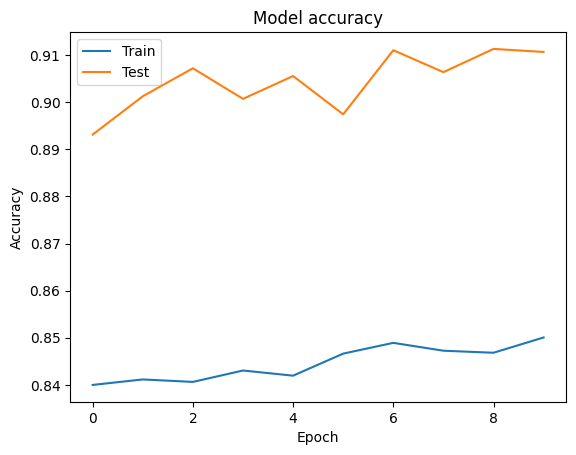

In [55]:
plot_accuracy(history)

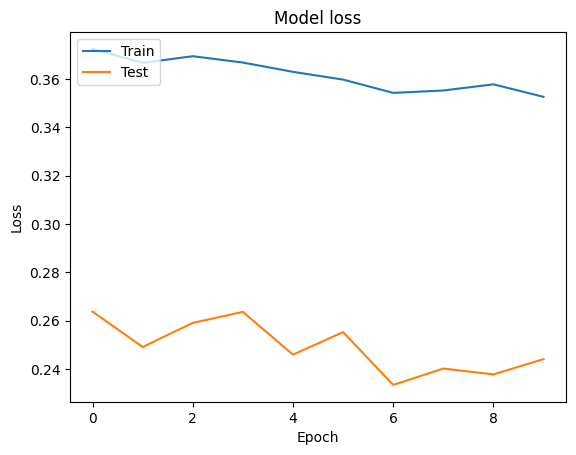

In [56]:
plot_loss(history)

2024-01-12 16:05:52.804019: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


343/343 [==============================] - 26s 47ms/step


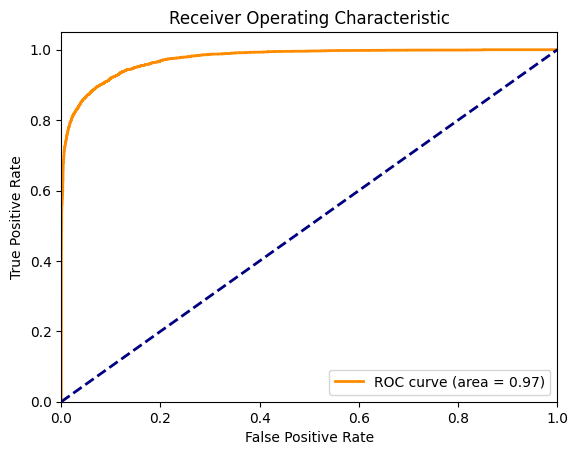

In [57]:
y_pred = binary_text_classifier.predict((np.asarray(X_test["input_ids"]), np.asarray(X_test["attention_masks"])))
plot_roc(y_test, y_pred)

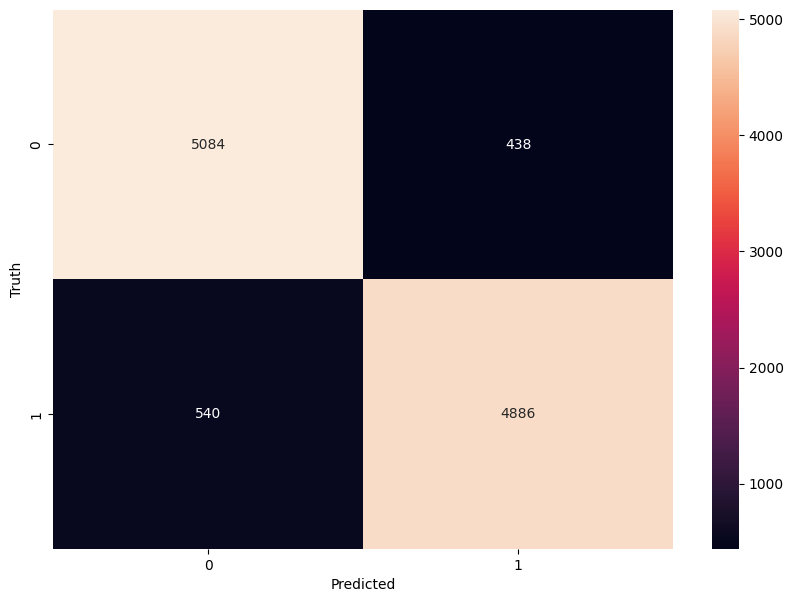

In [58]:
plot_confusion_matrix(y_test, y_pred)